# DATA ANALYSIS

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset into python environment

In [2]:
data=pd.read_csv('SideEffects_Classification.csv')
data

,Name,Gender,Condition,Race,EaseofUse,Effectiveness,Satisfaction,Age,BP,Cholesterol,SideEffects
0,Jennifer Hayes,F,ocd,W,4,3,4,64,NORMAL,NORMAL,Moderate Side Effects
1,George Schultz,M,"depression, lack of motivation",W,3,3,4,16,NORMAL,NORMAL,Moderate Side Effects
2,Michael Roach,M,depression and anxiety,W,4,3,4,65,LOW,NORMAL,Moderate Side Effects
3,Jennifer Bryant,F,major depression,B,2,2,2,17,NORMAL,NORMAL,Extremely Severe Side Effects
4,David Morris,M,depression/anxiety,W,4,4,1,45,LOW,NORMAL,No Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399995,Sean Bennett,M,depression,W,5,5,5,32,HIGH,HIGH,Mild Side Effects
399996,Timothy Mckay,M,depression,W,5,4,1,31,LOW,HIGH,No Side Effects
399997,Cassandra Frank,F,"anxiety, depresion",B,2,2,2,21,NORMAL,NORMAL,Extremely Severe Side Effects
399998,Craig Cortez,M,depression,W,5,4,1,41,LOW,HIGH,Mild Side Effects


# Basic details

In [3]:
data.head()

,Name,Gender,Condition,Race,EaseofUse,Effectiveness,Satisfaction,Age,BP,Cholesterol,SideEffects
0,Jennifer Hayes,F,ocd,W,4,3,4,64,NORMAL,NORMAL,Moderate Side Effects
1,George Schultz,M,"depression, lack of motivation",W,3,3,4,16,NORMAL,NORMAL,Moderate Side Effects
2,Michael Roach,M,depression and anxiety,W,4,3,4,65,LOW,NORMAL,Moderate Side Effects
3,Jennifer Bryant,F,major depression,B,2,2,2,17,NORMAL,NORMAL,Extremely Severe Side Effects
4,David Morris,M,depression/anxiety,W,4,4,1,45,LOW,NORMAL,No Side Effects


In [4]:
data.shape

(400000, 11)

In [5]:
data.isnull().sum()

Name             0
Gender           0
Condition        0
Race             0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Age              0
BP               0
Cholesterol      0
SideEffects      0
dtype: int64

In [6]:
data.dtypes

Name             object
Gender           object
Condition        object
Race             object
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Age               int64
BP               object
Cholesterol      object
SideEffects      object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           400000 non-null  object
 1   Gender         400000 non-null  object
 2   Condition      400000 non-null  object
 3   Race           400000 non-null  object
 4   EaseofUse      400000 non-null  int64 
 5   Effectiveness  400000 non-null  int64 
 6   Satisfaction   400000 non-null  int64 
 7   Age            400000 non-null  int64 
 8   BP             400000 non-null  object
 9   Cholesterol    400000 non-null  object
 10  SideEffects    400000 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.6+ MB


In [8]:
data.columns

Index(['Name', 'Gender', 'Condition', 'Race', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Age', 'BP', 'Cholesterol', 'SideEffects'],
      dtype='object')

In [9]:
data.describe()

,EaseofUse,Effectiveness,Satisfaction,Age
count,400000.000000,400000.000000,400000.000000,400000.000000
mean,4.022583,3.535185,3.137923,44.304480
std,1.316589,1.457049,1.611919,16.481277
min,1.000000,1.000000,1.000000,15.000000
25%,3.000000,3.000000,1.000000,31.000000
50%,5.000000,4.000000,3.000000,45.000000
75%,5.000000,5.000000,5.000000,58.000000
max,10.000000,10.000000,10.000000,74.000000


# Preprocessing

In [10]:
data['Race'].value_counts()

W    389566
B     10434
Name: Race, dtype: int64

In [11]:
data['Condition'].value_counts()

depression                            184532
anxiety                                31873
depression/anxiety                     25246
depression and anxiety                 12574
anxiety and depression                 12568
anxiety/depression                     12562
depression and generalized anxiety      6513
anxiety depression                      6490
ocd                                     6480
depression, ptsd                        6437
anxiety, stress                         6431
clinical depression                     6397
peri-menopausal syptoms                 6373
major depression/anxiety                6372
panic attacks                           6368
depression & anxiety                    6367
depression, anxiety                     6363
general depression/perimenopause        6362
nerves                                  6307
anxiety, depresion                      6275
depression, lack of motivation          6244
panic attacks and depression            6243
major depr

In [12]:
data['Condition']=data['Condition'].replace(['clinical depression','depression','major depression/anxiety','anxiety','anxiety/depression','major depression'],'anxiety/depression')
data['Condition']=data['Condition'].replace(['anxiety depression','anxiety, depresion','anxiety, depression','depression & anxiety','depression, anxiety','anxiety and depression','depression and generalized anxiety'],'depression and anxiety')
data['Condition']=data['Condition'].replace(['anxiety, stress'],'stress')
data['Condition']=data['Condition'].replace(['depression, ptsd'],'ptsd')
data['Condition']=data['Condition'].replace(['general depression/perimenopause','peri-menopausal syptoms'],'perimenopause')
data['Condition']=data['Condition'].replace(['panic attacks and depression'],'panic attacks')

# Checking whether any outliers is present

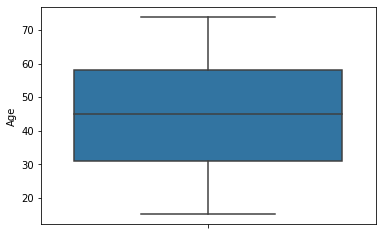

In [13]:
sns.boxplot(y=data['Age'],data=data)

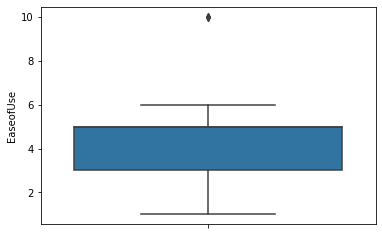

In [14]:
sns.boxplot(y=data['EaseofUse'],data=data)

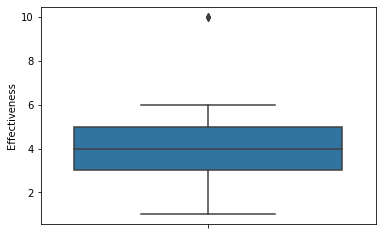

In [15]:
sns.boxplot(y=data['Effectiveness'],data=data)

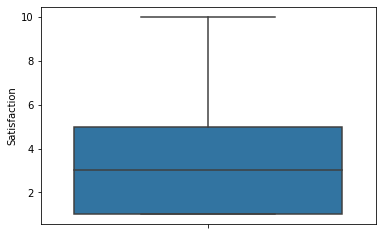

In [16]:
sns.boxplot(y=data['Satisfaction'],data=data)

# Heatmap

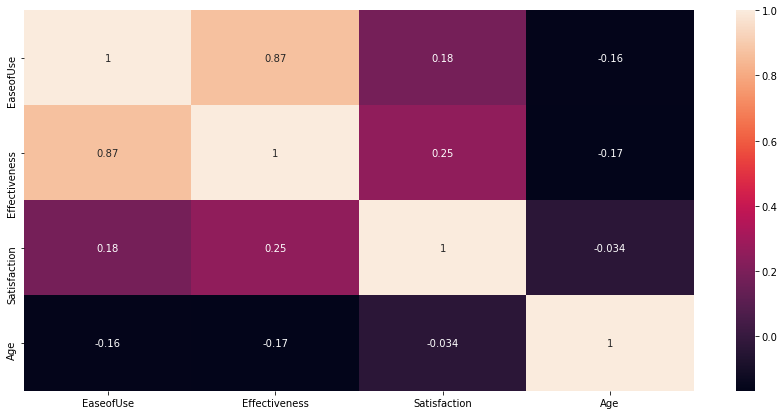

In [17]:
corr_matrix=data.corr()
plt.subplots(figsize=(15,7))
sns.heatmap(corr_matrix,annot=True)   

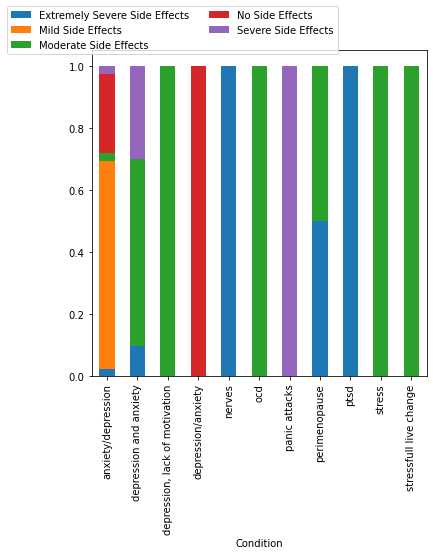

In [18]:
con=pd.crosstab(data['Condition'],data['SideEffects'])
con.div(con.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2) 

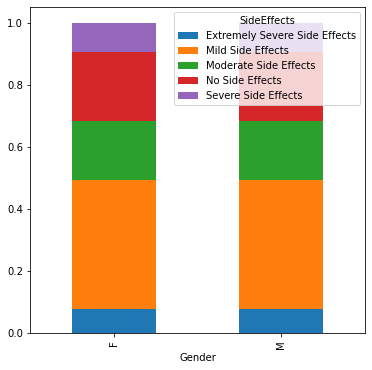

In [19]:
Sex=pd.crosstab(data['Gender'],data['SideEffects'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

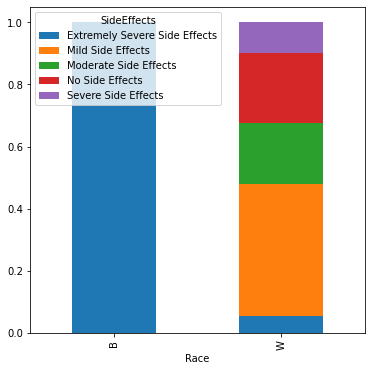

In [20]:
Race=pd.crosstab(data['Race'],data['SideEffects'])
Race.div(Race.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

# Feature engineering

In [21]:
data=data.drop(['Name'],axis=1)

# Encoding

In [22]:
# One-hot encoding

In [23]:
gender=pd.get_dummies(data['Gender'])
race=pd.get_dummies(data['Race'])


In [24]:
data=pd.concat([data,gender],axis=1)
data=data.drop(['Gender'],axis=1)
data=pd.concat([data,race],axis=1)
data=data.drop(['Race'],axis=1)


In [25]:
# Label encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['BP','Cholesterol','Condition']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

# Splitting as dependent and independent variables

In [27]:
y=data['SideEffects']
x=data.drop(['SideEffects'],axis=1)

# Splitting into train and test sets

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Multinomial logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.93
precision is  0.94
recall score is 0.93
f1 score is 0.93


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [33]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.98
precision is  0.98
recall score is 0.98
f1 score is 0.98


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [35]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 1.00
precision is  1.00
recall score is 1.00
f1 score is 1.00


# Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [38]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 1.00
precision is  1.00
recall score is 1.00
f1 score is 1.00


# Extreme Gradient Boosting

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [40]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 1.00
precision is  1.00
recall score is 1.00
f1 score is 1.00


# Naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB
NB=BernoulliNB()
NB.fit(x_train,y_train)
y_pred=NB.predict(x_test)

In [42]:
print('accuracy is {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('precision is  {:.2f}'.format(precision_score(y_test,y_pred,average='weighted')))
print('recall score is {:.2f}'.format(recall_score(y_test,y_pred,average='weighted')))
print('f1 score is {:.2f}'.format(f1_score(y_test,y_pred,average='weighted')))

accuracy is 0.75


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision is  0.74
recall score is 0.75
f1 score is 0.72
